In [ ]:
import os
from PIL import Image

# Directorio principal original
main_folder_original = '/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease'

# Nuevo directorio principal para las imágenes redimensionadas
main_folder_resized = '/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease_Resized'

# Dimensión deseada para las imágenes
target_size = (320, 320)  # Dimensión deseada

# Crear el nuevo directorio principal
os.makedirs(main_folder_resized, exist_ok=True)

# Iterar sobre cada carpeta en el directorio principal original
for folder_name in os.listdir(main_folder_original):
    folder_path_original = os.path.join(main_folder_original, folder_name)

    # Verificar si el elemento es una carpeta y no un archivo
    if os.path.isdir(folder_path_original):
        print(f"Procesando imágenes en el directorio: {folder_name}")

        # Crear un nuevo directorio para las imágenes redimensionadas
        folder_path_resized = os.path.join(main_folder_resized, folder_name + '_Resized')
        os.makedirs(folder_path_resized, exist_ok=True)

        # Iterar sobre todas las imágenes en la carpeta actual
        for filename in os.listdir(folder_path_original):
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Filtrar solo imágenes
                # Cargar la imagen
                img_path = os.path.join(folder_path_original, filename)
                img = Image.open(img_path)

                # Redimensionar la imagen
                img_resized = img.resize(target_size, Image.LANCZOS)

                # Guardar la imagen redimensionada en la carpeta nueva
                resized_img_path = os.path.join(folder_path_resized, filename)
                img_resized.save(resized_img_path)

        print(f"Imágenes en el directorio {folder_name} redimensionadas y guardadas en {folder_path_resized}")

Procesando imágenes en el directorio: Healthy
Imágenes en el directorio Healthy redimensionadas y guardadas en /content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease_Resized/Healthy_Resized
Procesando imágenes en el directorio: Anthracnose
Imágenes en el directorio Anthracnose redimensionadas y guardadas en /content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease_Resized/Anthracnose_Resized
Procesando imágenes en el directorio: Bacterial Canker
Imágenes en el directorio Bacterial Canker redimensionadas y guardadas en /content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease_Resized/Bacterial Canker_Resized
Procesando imágenes en el directorio: Sooty Mould
Imágenes en el directorio Sooty Mould redimensionadas y guardadas en /content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease_Resized/Sooty Mould_Resized
Procesando imágenes en el directorio: Die Back
Imágenes en el directorio Die Back red

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage.feature import hog
from tqdm import tqdm

# Directorio base
base_dir = '/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease_Resized'

# Función para calcular el HOG de una imagen
def calculate_hog(image):
    # Calcula el HOG
    hog_features, _ = hog(image, orientations=8, pixels_per_cell=(16, 16),
                          cells_per_block=(1, 1), visualize=True)
    return hog_features

# Lista para almacenar los datos
data = []

# Diccionario para mapear nombres de carpeta a números
folder_mapping = {}

# Itera sobre cada carpeta
for class_label, folder_name in enumerate(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        # Asigna un número a la carpeta y guarda en el diccionario
        folder_mapping[folder_name] = class_label
        print(f"Folder '{folder_name}' asignado como clase {class_label}")

        # Itera sobre cada imagen en la carpeta
        for img_name in tqdm(os.listdir(folder_path)):
            img_path = os.path.join(folder_path, img_name)
            if os.path.isfile(img_path):
                # Lee la imagen
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                # Calcula el HOG
                hog_features = calculate_hog(img)
                # Agrega los datos a la lista
                data.append([img_name, folder_name, class_label] + hog_features.tolist())

# Crea el DataFrame
columns = ['filename', 'folder', 'class'] + [f'hog_{i}' for i in range(len(data[0]) - 3)]
df = pd.DataFrame(data, columns=columns)

# Guarda el DataFrame en un archivo CSV
df.to_csv('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease_Resized/hog_features_Resized_1.csv', index=False)

# Imprime el mapeo de carpetas a clases
print("\nMapeo de carpetas a clases:")
for folder_name, class_label in folder_mapping.items():
    print(f"'{folder_name}' -> Clase {class_label}")

Folder 'Healthy_Resized' asignado como clase 0


100%|██████████| 500/500 [00:43<00:00, 11.43it/s]


Folder 'Anthracnose_Resized' asignado como clase 1


100%|██████████| 500/500 [00:39<00:00, 12.51it/s]


Folder 'Bacterial Canker_Resized' asignado como clase 2


100%|██████████| 500/500 [00:43<00:00, 11.39it/s]


Folder 'Sooty Mould_Resized' asignado como clase 3


100%|██████████| 500/500 [00:42<00:00, 11.82it/s]


Folder 'Die Back_Resized' asignado como clase 4


100%|██████████| 500/500 [00:39<00:00, 12.53it/s]


Folder 'Powdery Mildew_Resized' asignado como clase 5


100%|██████████| 500/500 [00:40<00:00, 12.34it/s]


Folder 'Gall Midge_Resized' asignado como clase 6


100%|██████████| 500/500 [00:39<00:00, 12.67it/s]


Folder 'Cutting Weevil_Resized' asignado como clase 7


100%|██████████| 500/500 [00:37<00:00, 13.42it/s]



Mapeo de carpetas a clases:
'Healthy_Resized' -> Clase 0
'Anthracnose_Resized' -> Clase 1
'Bacterial Canker_Resized' -> Clase 2
'Sooty Mould_Resized' -> Clase 3
'Die Back_Resized' -> Clase 4
'Powdery Mildew_Resized' -> Clase 5
'Gall Midge_Resized' -> Clase 6
'Cutting Weevil_Resized' -> Clase 7


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Cargar los datos
file_path = "/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease_Resized/hog_features_Resized_1.csv"
data = pd.read_csv(file_path)

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(columns=['filename', 'folder', 'class'])
y = data['class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador de regresión logística para cada clase usando One Vs All
models = {}
for class_label in y.unique():
    y_train_binary = (y_train == class_label)
    model = LogisticRegression(max_iter=1000)  # Puedes ajustar los parámetros según sea necesario
    model.fit(X_train, y_train_binary)
    models[class_label] = model

# Evaluar el rendimiento de los modelos
predictions = {}
for class_label, model in models.items():
    predictions[class_label] = model.predict(X_test)

# Imprimir reporte de clasificación
for class_label, prediction in predictions.items():
    print(f"Clase: {class_label}")
    print(classification_report((y_test == class_label), prediction))

Clase: 0
              precision    recall  f1-score   support

       False       0.93      0.99      0.96       677
        True       0.89      0.59      0.71       123

    accuracy                           0.93       800
   macro avg       0.91      0.79      0.83       800
weighted avg       0.92      0.93      0.92       800

Clase: 1
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       714
        True       0.73      0.52      0.61        86

    accuracy                           0.93       800
   macro avg       0.84      0.75      0.78       800
weighted avg       0.92      0.93      0.92       800

Clase: 2
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       688
        True       0.83      0.92      0.87       112

    accuracy                           0.96       800
   macro avg       0.91      0.94      0.93       800
weighted avg       0.96      0.96      0.96    

In [ ]:
import cv2
from skimage.feature import hog
import numpy as np

# Cargar la imagen
image_path = "/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease_Resized/Healthy_Resized/20211231_123105 (Custom).jpg"
image = cv2.imread(image_path)

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calcular las características HOG de la imagen
hog_features, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True)

# Reajustar las características HOG en una matriz 2D
hog_features = hog_features.reshape(1, -1)

# Hacer la predicción usando los modelos de regresión logística entrenados
predictions = {}
for class_label, model in models.items():
    prediction = model.predict(hog_features)
    predictions[class_label] = prediction[0]

# Imprimir la predicción
predicted_class = max(predictions, key=predictions.get)
print("La clase predicha es:", predicted_class)

La clase predicha es: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

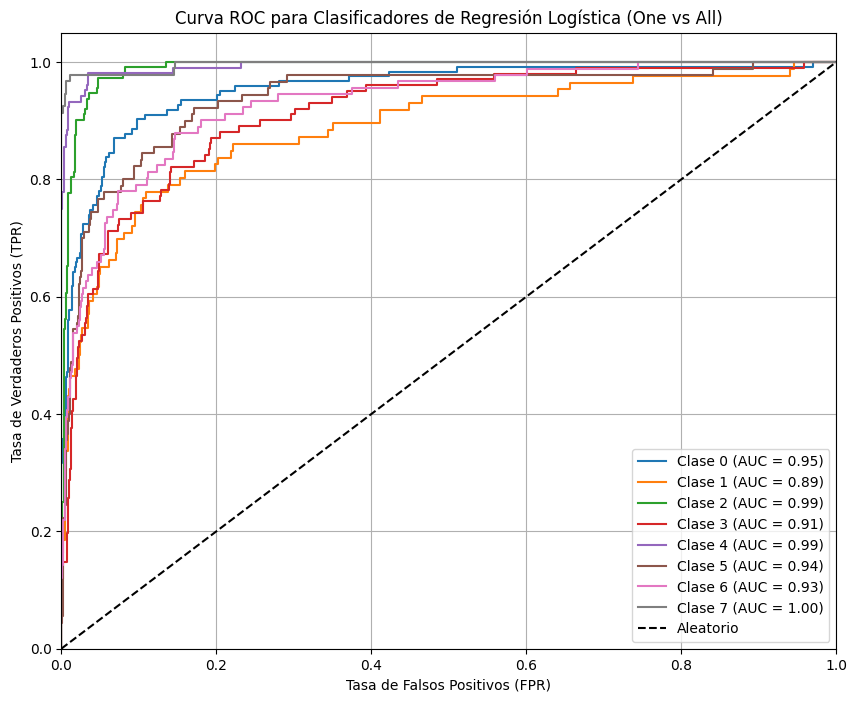

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Cargar los datos
file_path = "/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /mango_leaf_disease_Resized/hog_features_Resized_1.csv"
data = pd.read_csv(file_path)

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(columns=['filename', 'folder', 'class'])
y = data['class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador de regresión logística para cada clase usando One Vs All
models = {}
for class_label in y.unique():
    y_train_binary = (y_train == class_label)
    model = LogisticRegression(max_iter=1000)  # Puedes ajustar los parámetros según sea necesario
    model.fit(X_train, y_train_binary)
    models[class_label] = model

# Calcular y graficar la curva ROC para cada clasificador
plt.figure(figsize=(10, 8))
for class_label, model in models.items():
    y_test_binary = (y_test == class_label)
    y_score = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
    fpr, tpr, _ = roc_curve(y_test_binary, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {class_label} (AUC = {roc_auc:.2f})')

# Configuración del gráfico
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para Clasificadores de Regresión Logística (One vs All)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()